# Import

In [4]:
# Импортируем библиотеки и данные
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ny_housing = pd.read_csv("https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_01_visualization/data/NY-House-Dataset.csv")
ny_housing = ny_housing[ny_housing['PRICE'] <= 200000000]
ny_housing.head()

BROKERTITLE                TYPE  \
0        Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
1                                Brokered by Serhant      Condo for sale   
2                             Brokered by Sowae Corp      House for sale   
3                                Brokered by COMPASS      Condo for sale   
4  Brokered by Sotheby's International Realty - E...  Townhouse for sale   

       PRICE  BEDS       BATH  PROPERTYSQFT  \
0     315000     2   2.000000        1400.0   
1  195000000     7  10.000000       17545.0   
2     260000     4   2.000000        2015.0   
3      69000     3   1.000000         445.0   
4   55000000     7   2.373861       14175.0   

                                             ADDRESS                    STATE  \
0                               2 E 55th St Unit 803       New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...       New York, NY 10019   
2                                   620 Sinclair Ave  Staten Island, NY 10312   
3                            2 E 55th St Unit 908W33      Manhattan, NY 10022   
4                                        5 E 64th St       New York, NY 10065   

                                        MAIN_ADDRESS  \
0             2 E 55th St Unit 803New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...   
2            620 Sinclair AveStaten Island, NY 10312   
3         2 E 55th St Unit 908W33Manhattan, NY 10022   
4                      5 E 64th StNew York, NY 10065   

  ADMINISTRATIVE_AREA_LEVEL_2  LOCALITY      SUBLOCALITY       STREET_NAME  \
0             New York County  New York        Manhattan  East 55th Street   
1               United States  New York  New York County          New York   
2               United States  New York  Richmond County     Staten Island   
3               United States  New York  New York County          New York   
4               United States  New York  New York County          New York   

          LONG_NAME                                  FORMATTED_ADDRESS  \
0   Regis Residence  Regis Residence, 2 E 55th St #803, New York, N...   
1  West 57th Street             217 W 57th St, New York, NY 10019, USA   
2   Sinclair Avenue     620 Sinclair Ave, Staten Island, NY 10312, USA   
3  East 55th Street               2 E 55th St, New York, NY 10022, USA   
4  East 64th Street               5 E 64th St, New York, NY 10065, USA   

    LATITUDE  LONGITUDE  
0  40.761255 -73.974483  
1  40.766393 -73.980991  
2  40.541805 -74.196109  
3  40.761398 -73.974613  
4  40.767224 -73.969856

In [2]:
ny_housing.describe()

PRICE         BEDS         BATH  PROPERTYSQFT     LATITUDE  \
count  4.800000e+03  4800.000000  4800.000000   4800.000000  4800.000000   
mean   1.910039e+06     3.356042     2.373105   2182.579572    40.714268   
std    4.929167e+06     2.602054     1.946461   2374.709381     0.087639   
min    2.494000e+03     1.000000     0.000000    230.000000    40.499546   
25%    4.990000e+05     2.000000     1.000000   1200.000000    40.639512   
50%    8.250000e+05     3.000000     2.000000   2184.207862    40.726756   
75%    1.495000e+06     4.000000     3.000000   2184.207862    40.771924   
max    1.950000e+08    50.000000    50.000000  65535.000000    40.912729   

         LONGITUDE  
count  4800.000000  
mean    -73.941542  
std       0.101011  
min     -74.253033  
25%     -73.987143  
50%     -73.949182  
75%     -73.870638  
max     -73.702450

# Задание 1.1

## Визуализация 1. Распределение цен на недвижимость в Нью-Йорке

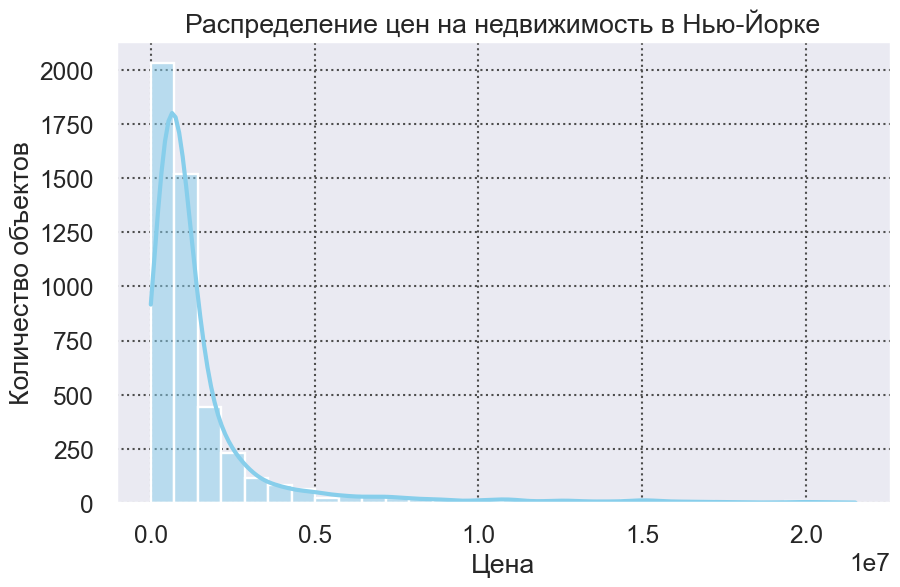

In [12]:
# Настройка стиля seaborn
sns.set_style("darkgrid", {"grid.color": ".3", "grid.linestyle": ":"})
sns.set_context("poster", font_scale = 0.8, rc={"grid.linewidth": 1.5})
# Фильтрация данных для удаления крайне высоких цен для более наглядной визуализации
filtered_prices = ny_housing[ny_housing['PRICE'] < ny_housing['PRICE'].quantile(0.99)]

# Визуализация распределения цен
plt.figure(figsize=(10, 6))
sns.histplot(filtered_prices['PRICE'], bins=30, kde=True, color='skyblue')
plt.title('Распределение цен на недвижимость в Нью-Йорке')
plt.xlabel('Цена')
plt.ylabel('Количество объектов')
plt.grid(True)
plt.show()

## **Вывод 1:**


На графике показано распределение цен на недвижимость в Нью-Йорке. Мы видим, что большинство цен сосредоточено в более низком диапазоне, указывая на то, что доступные объекты недвижимости преобладают на рынке. Распределение имеет длинный правый хвост, что указывает на наличие относительно небольшого числа объектов недвижимости с очень высокой стоимостью, что типично для рынка недвижимости, где эксклюзивные объекты могут иметь значительно более высокие цены.

## Визуализация 2. Количество объектов по типам недвижимости в Нью-Йорке

C:\Users\artfo\AppData\Local\Temp\ipykernel_4136\3413003704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette="viridis")


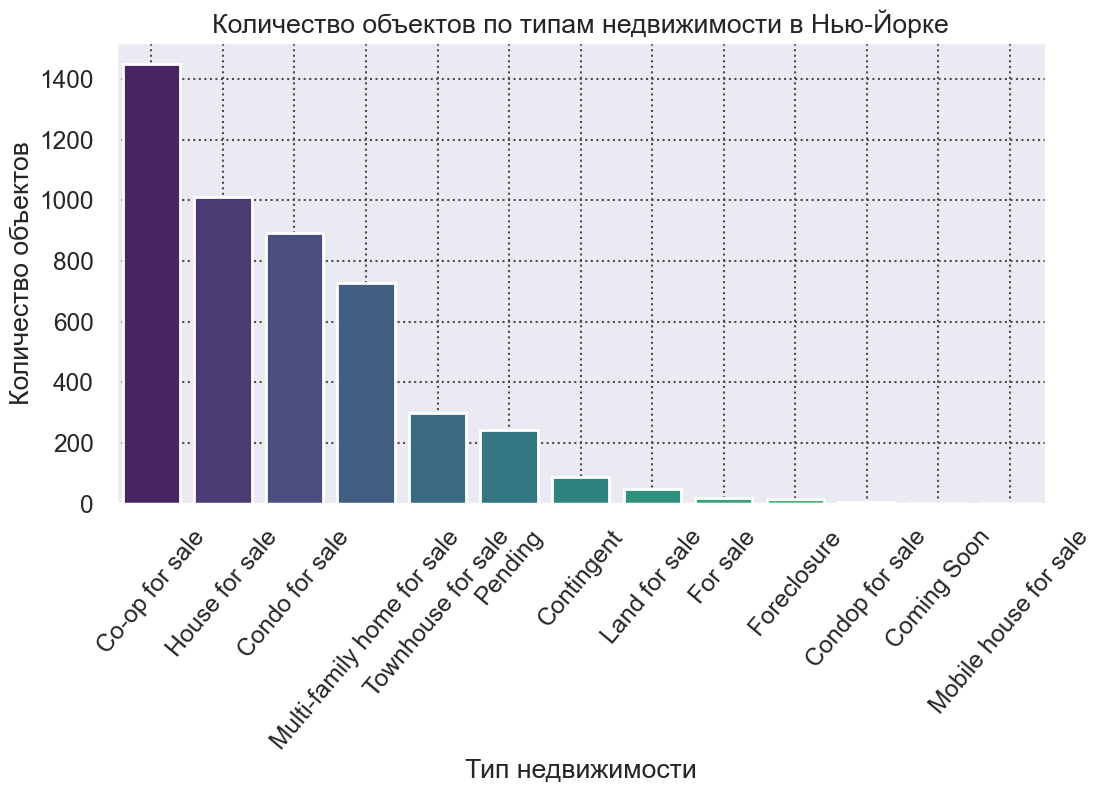

In [14]:
# Визуализация количества объектов по типам недвижимости
plt.figure(figsize=(12, 6))
type_counts = ny_housing['TYPE'].value_counts()
sns.barplot(x=type_counts.index, y=type_counts.values, palette="viridis")
plt.title('Количество объектов по типам недвижимости в Нью-Йорке')
plt.xlabel('Тип недвижимости')
plt.ylabel('Количество объектов')
plt.xticks(rotation=50)
plt.grid(True)
plt.show()

## **Вывод 2:**

На графике представлено количество объектов недвижимости в Нью-Йорке, разделённое по типам. Мы видим, что кондоминиумы и дома составляют большую часть предложений на рынке, что отражает высокий спрос и популярность этих типов жилья в городе. Другие типы недвижимости, такие как таунхаусы и квартиры, представлены в меньшем количестве. Это разнообразие типов объектов позволяет покупателям выбирать из широкого спектра возможностей в зависимости от их предпочтений и бюджета.

## Визуализация 3. Взаимосвязь между площадью объекта и ценой в Нью-Йорке

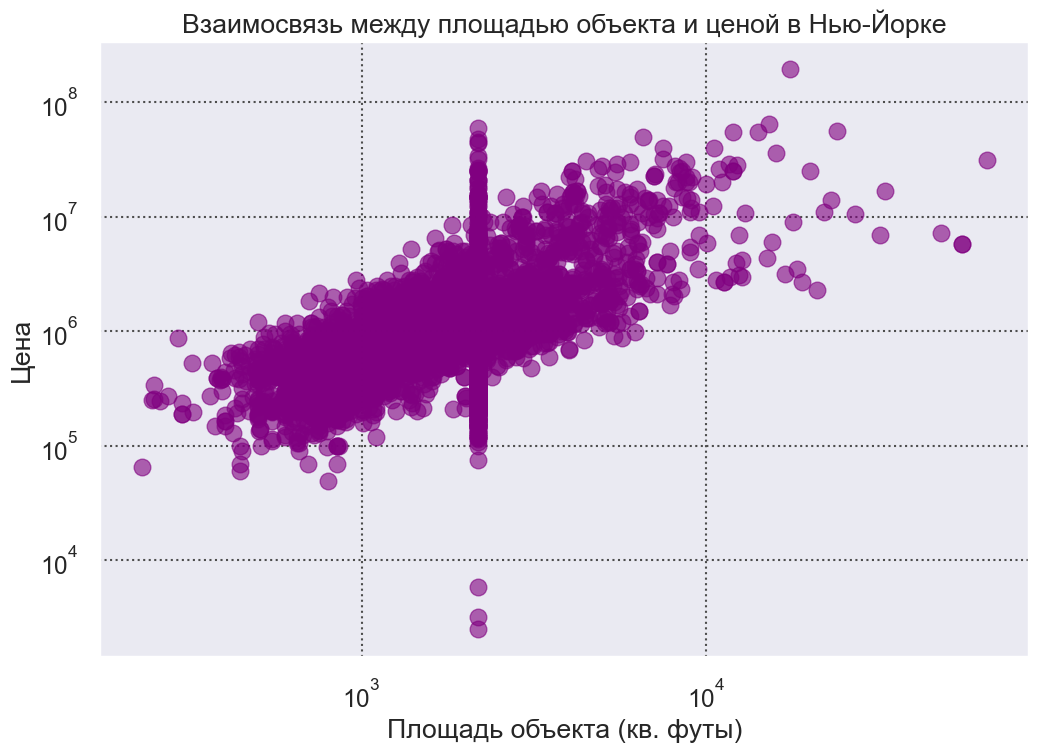

In [31]:
# Визуализация взаимосвязи между площадью объекта и его ценой
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PROPERTYSQFT', y='PRICE', data=ny_housing, alpha=0.6, edgecolor=None, color='purple')
plt.title('Взаимосвязь между площадью объекта и ценой в Нью-Йорке')
plt.xlabel('Площадь объекта (кв. футы)')
plt.ylabel('Цена')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

## **Вывод 3:**

График демонстрирует взаимосвязь между площадью объекта недвижимости (в квадратных футах) и его ценой. Использование логарифмического масштаба по обеим осям помогает лучше визуализировать эту зависимость, особенно в условиях широкого диапазона значений. Мы наблюдаем, что с увеличением площади объекта цена также, как правило, возрастает. Однако есть и исключения, указывающие на то, что другие факторы (например, местоположение, состояние объекта, уровень отделки) также играют значительную роль в формировании цены.

## Визуализация 4. Распределение количества спален

C:\Users\artfo\AppData\Local\Temp\ipykernel_4136\2623850610.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BEDS', data=ny_housing, palette="mako")


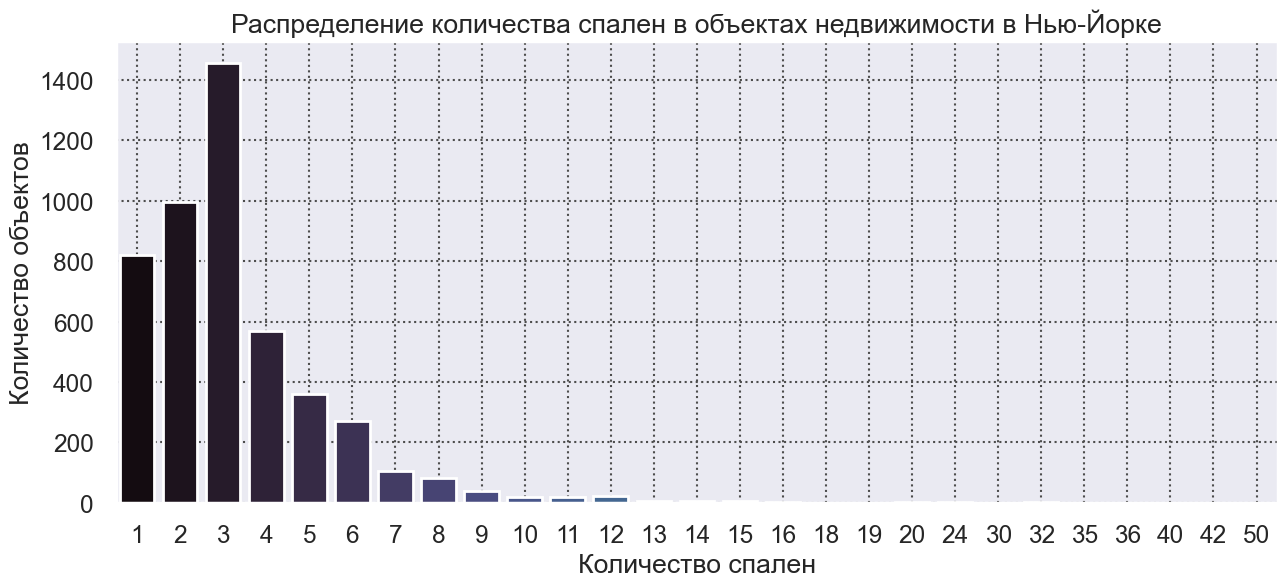

In [33]:
# Визуализация распределения количества спален
plt.figure(figsize=(15, 6))
sns.countplot(x='BEDS', data=ny_housing, palette="mako")
plt.title('Распределение количества спален в объектах недвижимости в Нью-Йорке')
plt.xlabel('Количество спален')
plt.ylabel('Количество объектов')
plt.grid(True)
plt.show()

## **Вывод 4:**

График показывает распределение количества спален в объектах недвижимости, доступных на рынке Нью-Йорка. Большинство объектов имеют от 1 до 3 спален, что указывает на высокий спрос и популярность жилья среднего размера, подходящего как для одиночек, так и для семей. Объекты с большим количеством спален встречаются реже, что может отражать как более высокую стоимость таких объектов, так и специфические потребности покупателей.

## Визуализация 5. Географическое распределение объектов

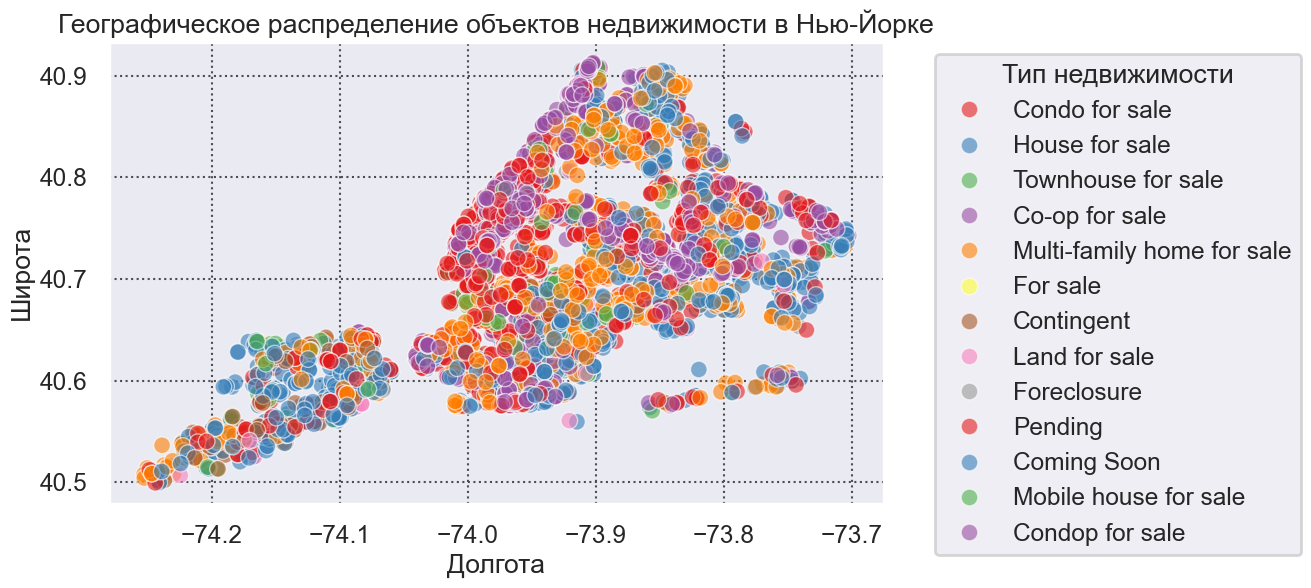

In [25]:
# Географическое распределение объектов недвижимости
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=ny_housing, hue='TYPE', palette="Set1", alpha=0.6)
plt.title('Географическое распределение объектов недвижимости в Нью-Йорке')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.grid(True)
plt.legend(title='Тип недвижимости', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## **Вывод 5:**

График иллюстрирует географическое распределение объектов недвижимости в Нью-Йорке, разделенное по типам недвижимости. Мы видим, что объекты недвижимости равномерно распределены по городу, но с некоторыми скоплениями в определенных районах. Различные типы недвижимости (как кондоминиумы, так и дома) доступны по всему городу, что предоставляет покупателям широкий выбор в зависимости от их предпочтений и бюджета. Важно отметить, что некоторые районы могут иметь более высокую концентрацию определенных типов недвижимости, что может быть связано с историческими, экономическими и культурными особенностями этих районов.

## Визуализация 6. Средняя цена недвижимости

C:\Users\artfo\AppData\Local\Temp\ipykernel_4136\1776484491.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PRICE', y='TYPE', data=average_price_by_type_sorted, palette='coolwarm')


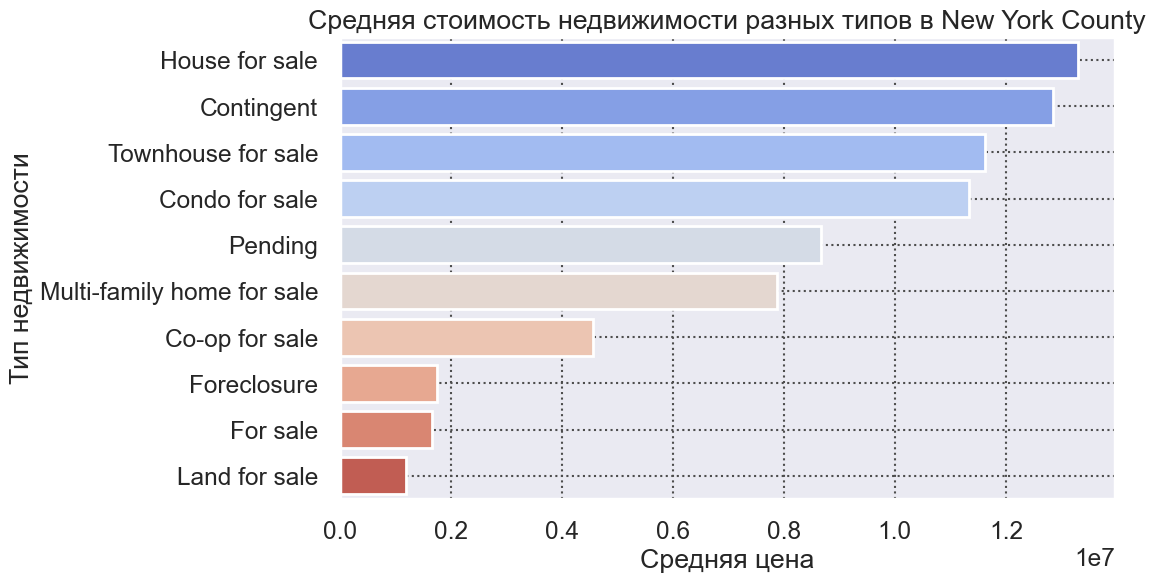

In [42]:
ny_county_data = ny_housing[ny_housing['SUBLOCALITY'] == 'New York County']

# Группировка по типу недвижимости и расчет средней цены
average_price_by_type = ny_county_data.groupby('TYPE')['PRICE'].mean().reset_index()

# Сортировка по убыванию средней цены
average_price_by_type_sorted = average_price_by_type.sort_values('PRICE', ascending=False)

# Создание barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='PRICE', y='TYPE', data=average_price_by_type_sorted, palette='coolwarm')
plt.title('Средняя стоимость недвижимости разных типов в New York County')
plt.xlabel('Средняя цена')
plt.ylabel('Тип недвижимости')
plt.grid(True)
plt.show()

## **Вывод 6:**

**Различия в ценовых категориях***: График показывает значительные различия в средней цене между разными типами недвижимости в Нью-Йорке. Это подчеркивает важность типа объекта при оценке стоимости недвижимости.

**Высокая стоимость определенных типов**: Некоторые типы недвижимости, такие как "Townhouse" и "Condo", имеют значительно более высокую среднюю стоимость по сравнению с другими типами, что может отражать их эксклюзивность, расположение или дополнительные удобства.

**Доступность определенных типов**: Другие типы, например, "Apartment" или "House", показывают более низкую среднюю стоимость, что может делать их более доступными для широкого круга покупателей.

**Влияние расположения и характеристик**: Средняя цена также может отражать различия в расположении, размере, состоянии и особенностях объектов недвижимости внутри каждого типа.

## Визуализация 7

C:\Users\artfo\AppData\Local\Temp\ipykernel_4136\3680144471.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price_by_area.values, y=average_price_by_area.index, palette="mako")


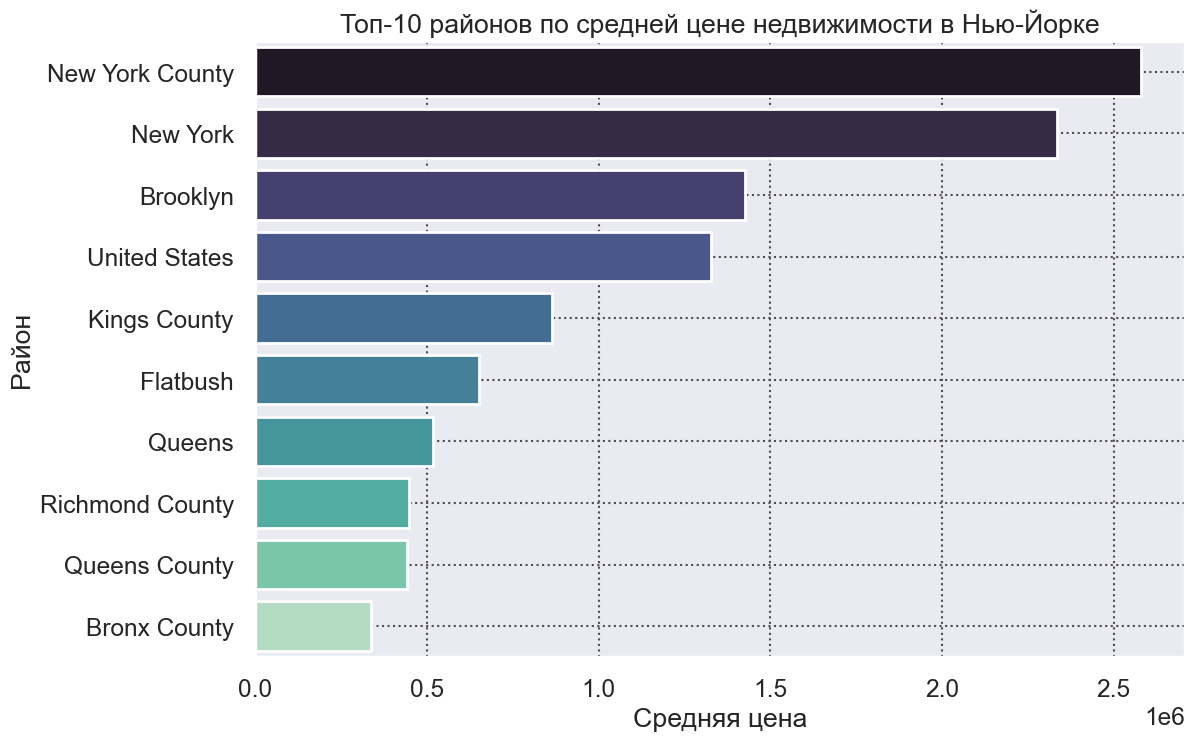

In [28]:
average_price_by_area = ny_housing.groupby('LOCALITY')['PRICE'].mean().sort_values(ascending=False)[:10]

# Визуализация средней цены недвижимости по районам
plt.figure(figsize=(12, 8))
sns.barplot(x=average_price_by_area.values, y=average_price_by_area.index, palette="mako")
plt.title('Топ-10 районов по средней цене недвижимости в Нью-Йорке')
plt.xlabel('Средняя цена')
plt.ylabel('Район')
plt.grid(True)
plt.show()

## **Вывод 7:**

Самые высокие цены на недвижимость наблюдаются в районе "New York County", что может указывать на высокий спрос и престижность этого района, а возможно, и на большее количество объектов премиум-класса.

Выделяется район "Brooklyn" с также довольно высокими ценами, что может отражать популярность этого района и/или наличие в нем значительного количества дорогой недвижимости.

Районы "Queens County", "Richmond County" и "Bronx County" имеют сравнительно более низкие средние цены на недвижимость, что может говорить о более доступных вариантах жилья или меньшей плотности населения с премиум-недвижимостью.

# Задание 1.2

C:\Users\artfo\AppData\Local\Temp\ipykernel_4136\692774031.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette="viridis", ax=axs[0, 1])
C:\Users\artfo\AppData\Local\Temp\ipykernel_4136\692774031.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BEDS', data=ny_housing, palette="mako", ax=axs[1, 1])
C:\Users\artfo\AppData\Local\Temp\ipykernel_4136\692774031.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PRICE', y='TYPE', data=average_price_by_type_sorted, palette='coolwarm', 

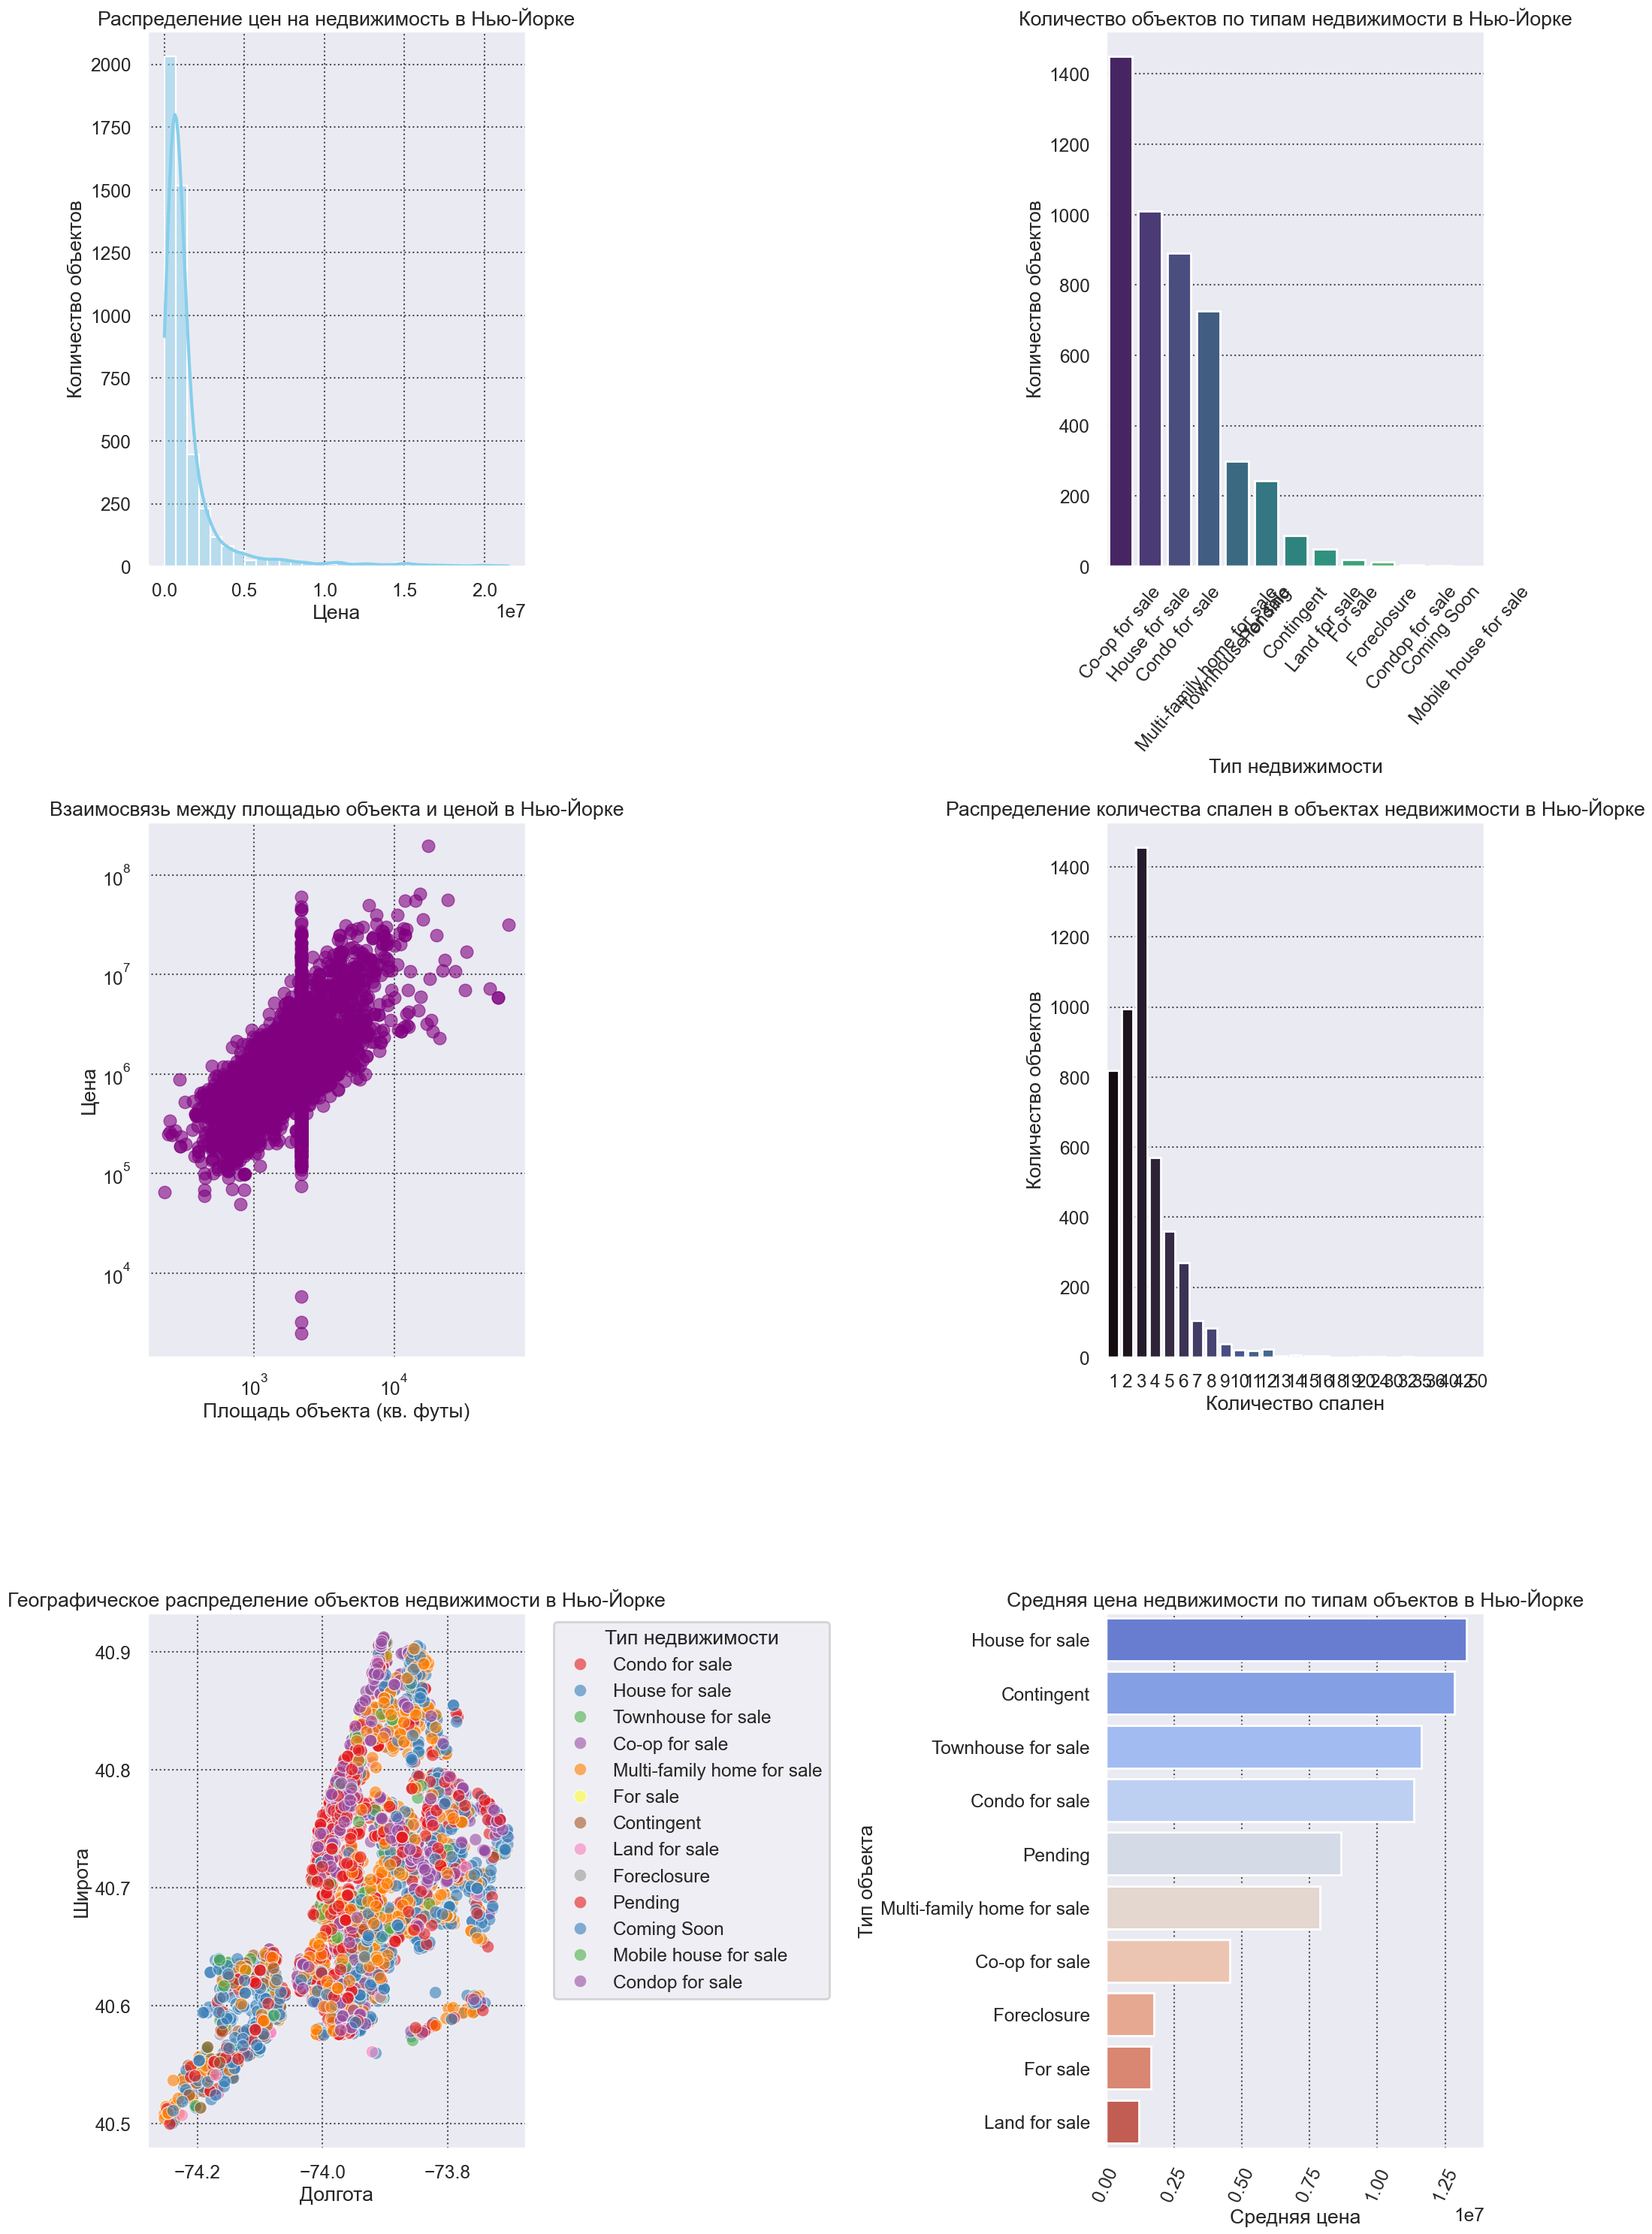

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Установим стили для seaborn
sns.set_style("darkgrid", {"grid.color": ".3", "grid.linestyle": ":"})
sns.set_context("poster", font_scale = 0.8, rc={"grid.linewidth": 1.5})

# Подготовка данных для визуализации
# Фильтрация данных для удаления крайне высоких цен
filtered_prices = ny_housing[ny_housing['PRICE'] < ny_housing['PRICE'].quantile(0.99)]

# Количество объектов по типам недвижимости
type_counts = ny_housing['TYPE'].value_counts()

# Визуализация средней цены недвижимости по районам
average_price_by_area = ny_housing.groupby('LOCALITY')['PRICE'].mean().sort_values(ascending=False)[:10]

# Создание полотна 3x2 для графиков
fig, axs = plt.subplots(3, 2, figsize=(20, 30))

# Распределение цен на недвижимость в Нью-Йорке
sns.histplot(filtered_prices['PRICE'], bins=30, kde=True, color='skyblue', ax=axs[0, 0])
axs[0, 0].set_title('Распределение цен на недвижимость в Нью-Йорке')
axs[0, 0].set_xlabel('Цена')
axs[0, 0].set_ylabel('Количество объектов')

# Количество объектов по типам недвижимости в Нью-Йорке
sns.barplot(x=type_counts.index, y=type_counts.values, palette="viridis", ax=axs[0, 1])
axs[0, 1].set_title('Количество объектов по типам недвижимости в Нью-Йорке')
axs[0, 1].set_xlabel('Тип недвижимости')
axs[0, 1].set_ylabel('Количество объектов')
axs[0, 1].tick_params(axis='x', rotation=50)

# Взаимосвязь между площадью объекта и ценой в Нью-Йорке
sns.scatterplot(x='PROPERTYSQFT', y='PRICE', data=ny_housing, alpha=0.6, edgecolor=None, color='purple', ax=axs[1, 0])
axs[1, 0].set_title('Взаимосвязь между площадью объекта и ценой в Нью-Йорке')
axs[1, 0].set_xlabel('Площадь объекта (кв. футы)')
axs[1, 0].set_ylabel('Цена')
axs[1, 0].set_xscale('log')
axs[1, 0].set_yscale('log')

# Распределение количества спален в объектах недвижимости в Нью-Йорке
sns.countplot(x='BEDS', data=ny_housing, palette="mako", ax=axs[1, 1])
axs[1, 1].set_title('Распределение количества спален в объектах недвижимости в Нью-Йорке')
axs[1, 1].set_xlabel('Количество спален')
axs[1, 1].set_ylabel('Количество объектов')

# Географическое распределение объектов недвижимости в Нью-Йорке
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=ny_housing, hue='TYPE', palette="Set1", alpha=0.6, ax=axs[2, 0])
axs[2, 0].set_title('Географическое распределение объектов недвижимости в Нью-Йорке')
axs[2, 0].set_xlabel('Долгота')
axs[2, 0].set_ylabel('Широта')
axs[2, 0].legend(title='Тип недвижимости', bbox_to_anchor=(1.05, 1), loc='upper left')

# Средняя цена недвижимости по типам объектов в Нью-Йорке
sns.barplot(x='PRICE', y='TYPE', data=average_price_by_type_sorted, palette='coolwarm', ax=axs[2, 1])
axs[2, 1].set_title('Средняя цена недвижимости по типам объектов в Нью-Йорке')
axs[2, 1].set_xlabel('Средняя цена')
axs[2, 1].set_ylabel('Тип объекта')
axs[2, 1].tick_params(axis='x', rotation=65)

# Автоматическая корректировка макета
plt.tight_layout()

# Сохранение дашборда в файл
plt.savefig('export/ny_housing_dashboard.png')

plt.show()

# Задание 1.3

*Уже написал в задании 1.1 после каждого графика отдельно, но продублирую саммари:*<br><br>
**Распределение цен на недвижимость в Нью-Йорке (верхний левый):**

Гистограмма показывает распределение цен на недвижимость с фильтрацией самых высоких цен. Большинство объектов сосредоточены в нижнем диапазоне цен, что указывает на высокое количество доступного жилья по сравнению с премиум-сегментом.
Есть видимый пик в начале графика, что может указывать на наличие большого количества недвижимости в более низком ценовом сегменте.
Цены имеют правостороннюю асимметрию, что является типичным для рынка недвижимости, где небольшое количество объектов имеет значительно более высокую стоимость.
Количество объектов по типам недвижимости в Нью-Йорке (верхний правый):

Этот столбчатый график показывает количество объектов для каждого типа недвижимости. Наибольшее количество объектов представлено категорией "Condo for sale".
Наблюдается значительно меньшее количество объектов для других типов недвижимости, таких как "Townhouse for sale" и "Multi-family home for sale", что может отражать предпочтения на рынке или доступность разных типов недвижимости.
Взаимосвязь между площадью объекта и ценой в Нью-Йорке (средний левый):

Точечная диаграмма показывает, что существует положительная корреляция между площадью объекта и его ценой. Объекты с большей площадью, как правило, стоят дороже.
Использование логарифмического масштаба на обеих осях помогает лучше визуализировать распределение точек и видеть закономерности в данных, которые могут быть не очевидны в линейном масштабе.
Распределение количества спален в объектах недвижимости в Нью-Йорке (средний правый):

Столбчатая диаграмма количества спален показывает, что большинство объектов имеют от 1 до 3 спален, с пиком на 2 спальни. Это может отражать предпочтения покупателей или арендаторов недвижимости в Нью-Йорке.
Географическое распределение объектов недвижимости в Нью-Йорке (нижний левый):

Распределение объектов недвижимости по географическим координатам с разделением по типам показывает, как разные типы недвижимости распределены по городу. Это может быть полезно для идентификации территориальных трендов, например, некоторые районы могут быть более популярны для квартир, в то время как другие — для частных домов.
Средняя цена недвижимости по типам объектов в Нью-Йорке (нижний правый):

График показывает среднюю цену для различных типов недвижимости. Например, видно, что таунхаусы и квартиры имеют более высокую среднюю цену по сравнению с другими типами. Это может указывать на более высокую ценность этих типов объектов на рынке недвижимости или наличие большего количества премиальных предложений в этих категориях.

# Задание 1.4

Строил этот график выше, дублирую

C:\Users\artfo\AppData\Local\Temp\ipykernel_4136\1776484491.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PRICE', y='TYPE', data=average_price_by_type_sorted, palette='coolwarm')


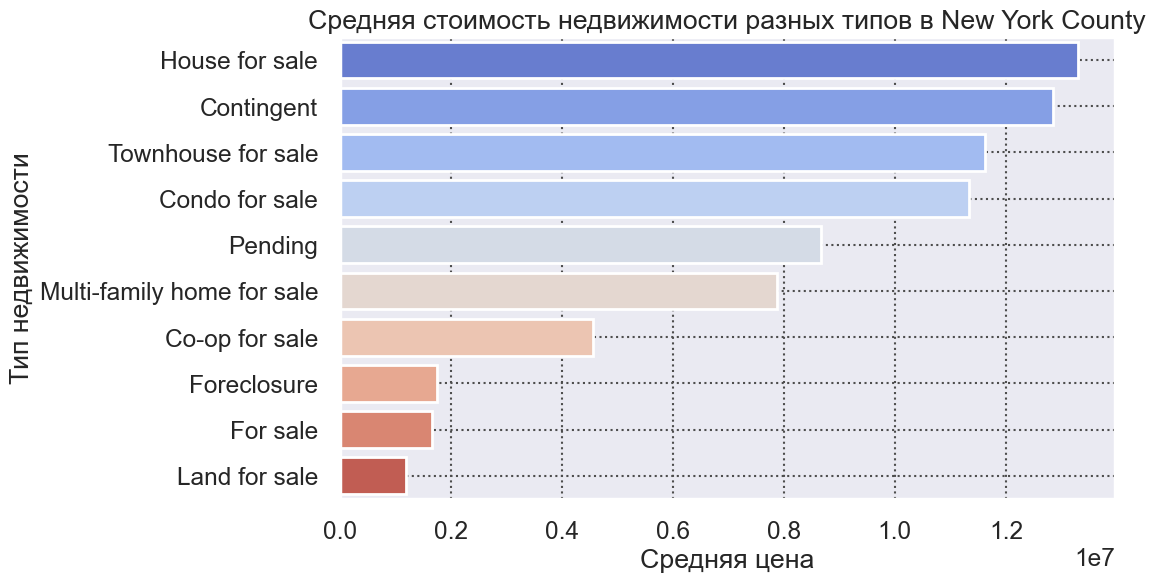

In [41]:
ny_county_data = ny_housing[ny_housing['SUBLOCALITY'] == 'New York County']

# Группировка по типу недвижимости и расчет средней цены
average_price_by_type = ny_county_data.groupby('TYPE')['PRICE'].mean().reset_index()

# Сортировка по убыванию средней цены
average_price_by_type_sorted = average_price_by_type.sort_values('PRICE', ascending=False)

# Создание barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='PRICE', y='TYPE', data=average_price_by_type_sorted, palette='coolwarm')
plt.title('Средняя стоимость недвижимости разных типов в New York County')
plt.xlabel('Средняя цена')
plt.ylabel('Тип недвижимости')
plt.grid(True)
plt.show()

## Вывод:

**"House for sale" (Дома на продажу)** имеют самую высокую среднюю стоимость среди всех типов недвижимости в New York County. Это может быть связано с тем, что частные дома часто имеют большую площадь, приватность и могут включать земельные участки.

**"Contingent" (Условно проданная недвижимость)** и **"Townhouse for sale" (Таунхаусы на продажу)** также имеют высокую среднюю стоимость. Таунхаусы могут быть ценными из-за своего уникального стиля и иногда исторической значимости, а также из-за местоположения в популярных районах.

**"Condo for sale" (Квартиры на продажу)** имеют среднюю стоимость, что отражает их популярность и доступность для более широкого круга покупателей. Кондоминиумы могут включать различные удобства, которые также влияют на их стоимость.

В нижнем сегменте по средней цене находятся такие типы, как **"Co-op for sale"** (Жилищные кооперативы на продажу), **"Foreclosure" (Имущество, продаваемое из-за неуплаты ипотеки)** и **"Land for sale" (Земельные участки на продажу)**. Это может отражать более низкую стоимость этих типов недвижимости или их специфические условия продажи (например, продажа за долги или продажа без строений).

# Задание 1.4

C:\Users\artfo\AppData\Local\Temp\ipykernel_4136\3108710765.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout() # Автоматически подгоняет размеры элементов графика


<Figure size 1400x1000 with 0 Axes>

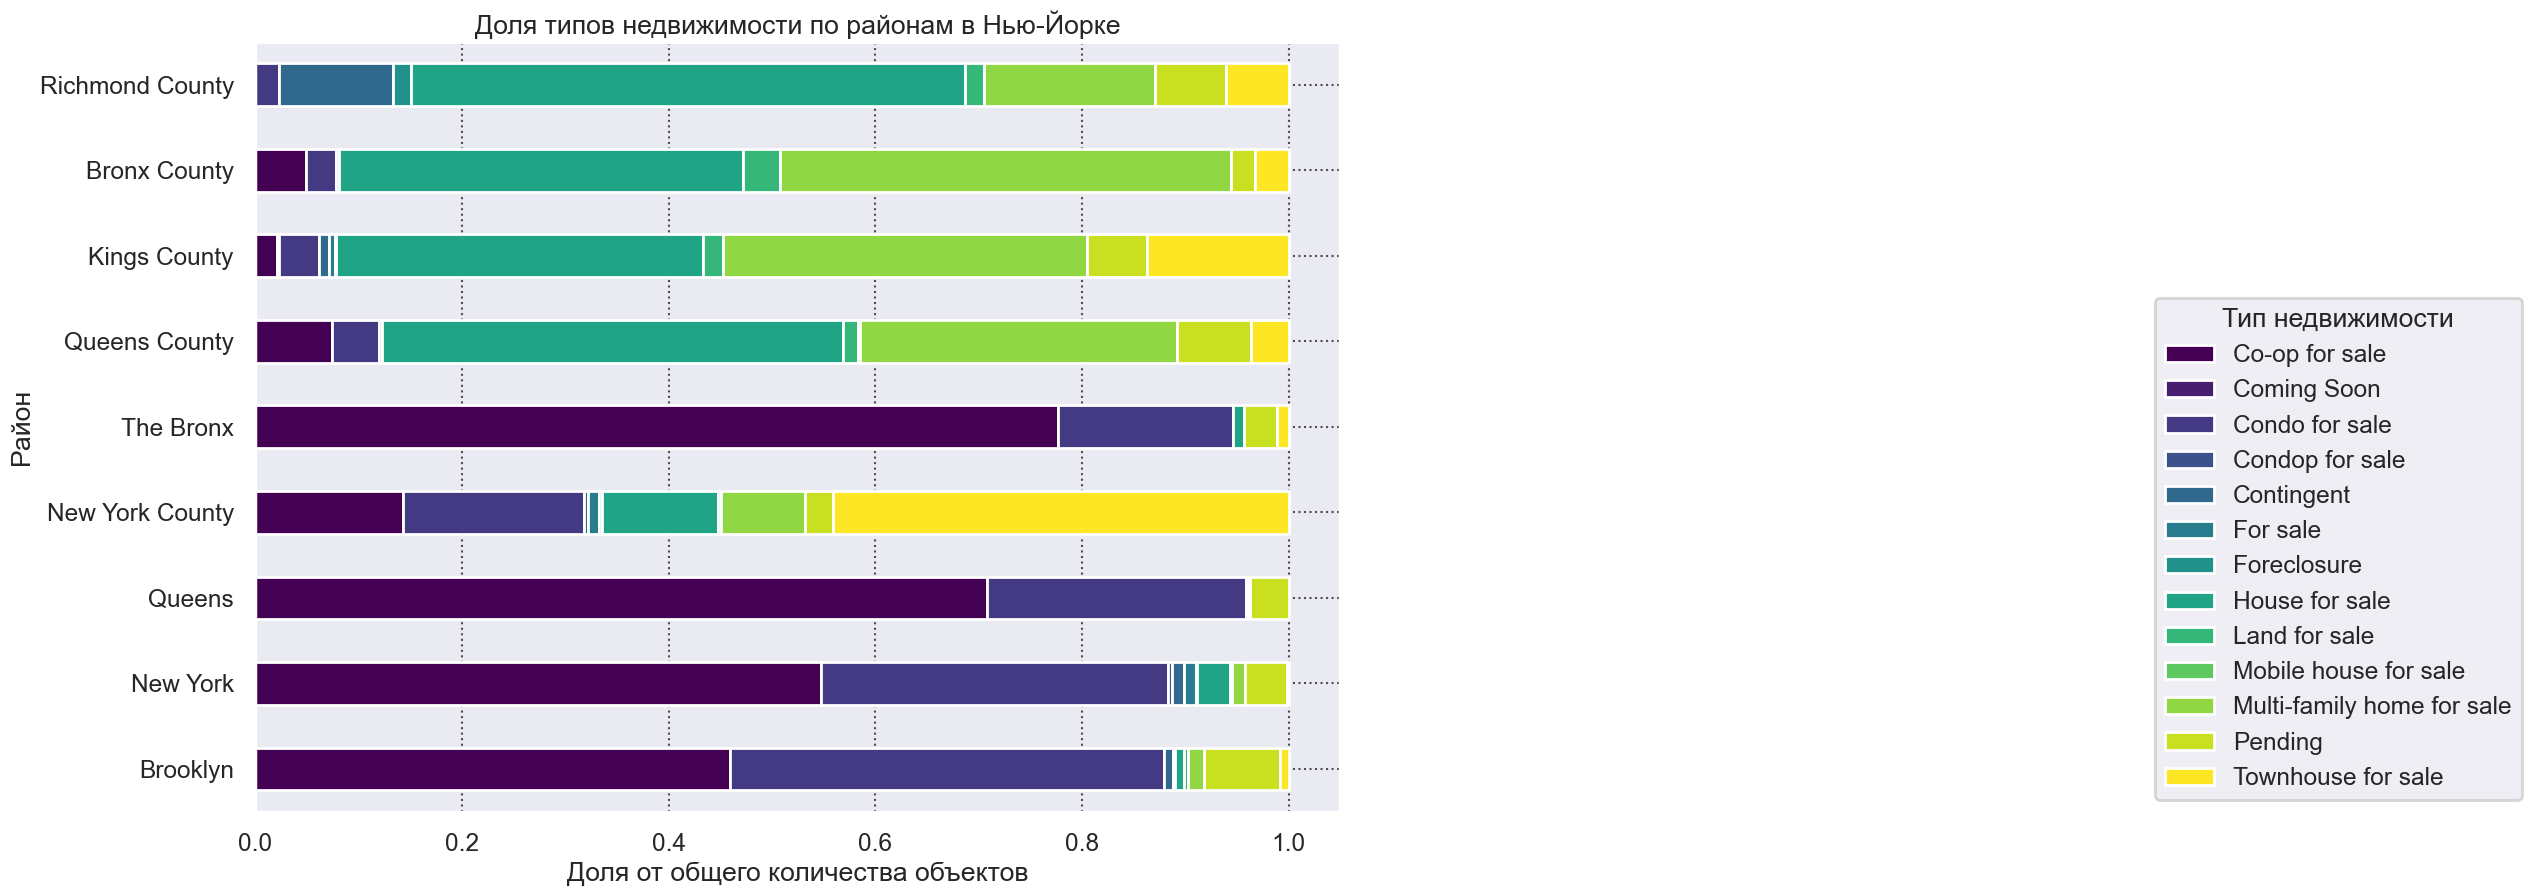

In [82]:
# Фильтрация районов, где количество наблюдений >= 100
sublocality_counts = ny_housing['SUBLOCALITY'].value_counts()
sublocalities_filtered = sublocality_counts[sublocality_counts >= 100].index

# Фильтрация данных для включения только этих районов
ny_housing_filtered = ny_housing[ny_housing['SUBLOCALITY'].isin(sublocalities_filtered)]

# Подсчет количества каждого типа недвижимости в каждом районе
type_by_sublocality = ny_housing_filtered.groupby(['SUBLOCALITY', 'TYPE']).size().unstack(fill_value=0)

# Вычисление доли каждого типа недвижимости от общего количества в каждом районе
type_by_sublocality_percentage = type_by_sublocality.div(type_by_sublocality.sum(axis=1), axis=0)

# Сортировка районов по убыванию доли квартир (Condo for sale)
sorted_sublocalities = type_by_sublocality_percentage['Condo for sale'].sort_values(ascending=False).index

# Фильтрация отсортированных данных для визуализации
sorted_data_to_plot = type_by_sublocality_percentage.loc[sorted_sublocalities]

# Создание горизонтального bar plot
plt.figure(figsize=(14, 10))
sorted_data_to_plot.plot(kind='barh', stacked=True, colormap='viridis', figsize=(14, 10))
plt.title('Доля типов недвижимости по районам в Нью-Йорке')
plt.xlabel('Доля от общего количества объектов')
plt.ylabel('Район')
plt.legend(title='Тип недвижимости', loc='lower right', bbox_to_anchor=(1.9, 0, 0.2, 0.2))
plt.tight_layout() # Автоматически подгоняет размеры элементов графика
plt.show()


## Вывод

В *Brooklyn* большую долю составляют *квартиры (Condo for sale)*, что указывает на высокую популярность этого типа недвижимости в этом районе. Это может быть связано с высоким спросом на жилье в многоэтажных зданиях из-за ограниченного пространства и высокой плотности населения.

В *New York County* и *Queens* также высока доля квартир, хотя и несколько ниже, чем в *Brooklyn*. В этих районах присутствует большее разнообразие типов недвижимости, включая кооперативы *(Co-op for sale)* и *таунхаусы (Townhouse for sale)*.

*The Bronx* и *Queens County* показывают более разнообразную структуру типов недвижимости, с более равномерным распределением между квартирами, домами и таунхаусами.

В *Kings County* и *Bronx County* дома и таунхаусы занимают значительную долю, что может указывать на большее количество семейного и многоквартирного жилья.

*Richmond County* отличается от других районов более высокой долей *частных домов (House for sale*), что может отражать более низкую плотность застройки и доступность земельных участков.

# Задание 2.1

Выбросы часто встречаются в данных, где возможны значительные отклонения от средних значений, особенно когда речь идет о таких показателях, как **цена (PRICE)** и **размер недвижимости (PROPERTYSQFT)**. Такие отклонения могут быть вызваны редкими, уникальными или экстремальными значениями. Например, очень дорогие или очень большие объекты недвижимости могут сильно отличаться от большинства доступных объектов на рынке.

Другие числовые переменные, такие как количеств**о спален (BED**S) ил**и ванных комнат (BAT**H), менее подвержены выбросам, так как они обычно ограничены практическими соображениями использования жилого пространства и не могут принимать крайне высокие значения. Например, очень мало домов будут иметь более 10 спален.

C:\Users\artfo\AppData\Local\Temp\ipykernel_4136\2007489860.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PRICE', y='TYPE', data=ny_housing, palette='mako')


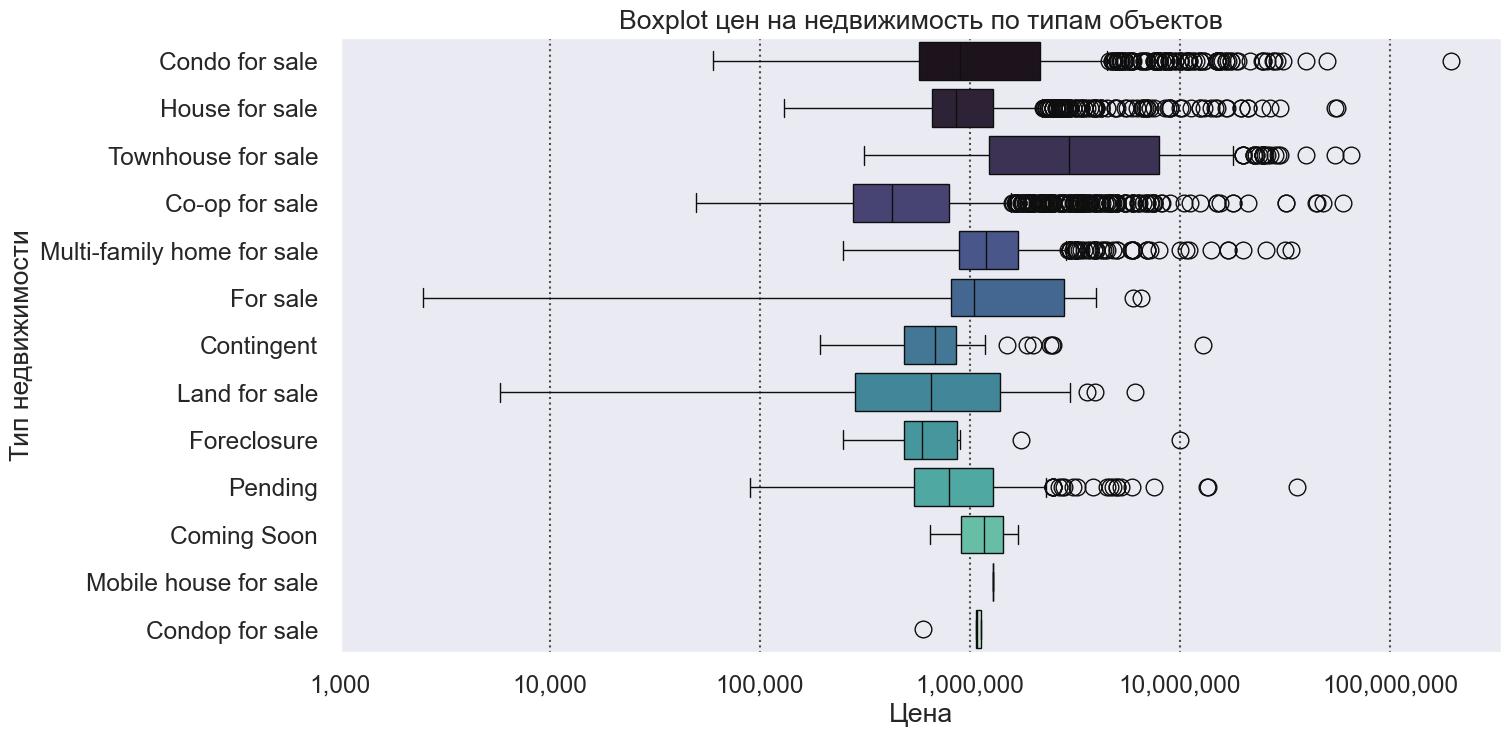

C:\Users\artfo\AppData\Local\Temp\ipykernel_4136\2007489860.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PROPERTYSQFT', y='TYPE', data=ny_housing, palette='mako')


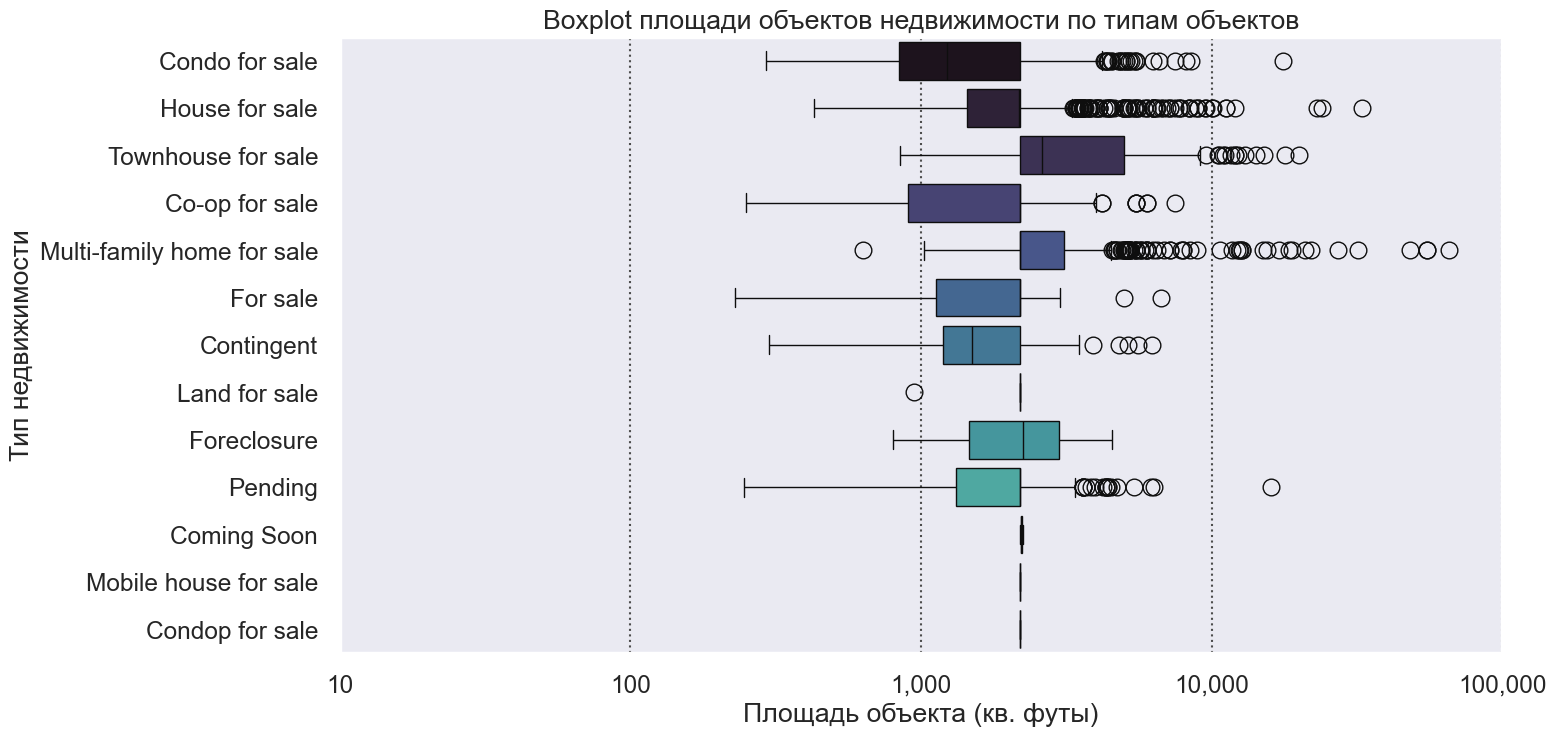

In [106]:
# Создание boxplot для PRICE по типу недвижимости
plt.figure(figsize=(15, 8))
sns.boxplot(x='PRICE', y='TYPE', data=ny_housing, palette='mako')
plt.title('Boxplot цен на недвижимость по типам объектов')
plt.xlabel('Цена')
plt.ylabel('Тип недвижимости')
plt.xscale('log')
plt.xticks(ticks=[10**3, 10**4, 10**5, 10**6, 10**7, 10**8], labels=['1,000', '10,000', '100,000', '1,000,000', '10,000,000', '100,000,000'])
plt.show()

# Создание boxplot для PROPERTYSQFT по типу недвижимости
plt.figure(figsize=(15, 8))
sns.boxplot(x='PROPERTYSQFT', y='TYPE', data=ny_housing, palette='mako')
plt.title('Boxplot площади объектов недвижимости по типам объектов')
plt.xlabel('Площадь объекта (кв. футы)')
plt.ylabel('Тип недвижимости')
plt.xscale('log')
plt.xticks(ticks=[10**1, 10**2, 10**3, 10**4, 10**5], labels=['10', '100', '1,000', '10,000', '100,000'])
plt.show()

## Вывод:

На первом boxplot, который показывает распределение цен (PRICE) по типам недвижимости (TYPE), можно заметить следующее:

Видны значительные выбросы для большинства типов недвижимости, особенно для "Condo for sale" и "Townhouse for sale". Эти выбросы представляют собой очень высокие цены, которые сильно отличаются от среднего уровня цен в каждой категории.
Разброс цен внутри каждого типа недвижимости велик, что указывает на значительное разнообразие стоимости объектов недвижимости внутри каждой категории.
На втором boxplot, отображающем распределение площадей объектов недвижимости (PROPERTYSQFT), наблюдаются следующие особенности:

Также видны выбросы для многих типов недвижимости, что указывает на наличие объектов с необычно большой площадью по сравнению с большинством объектов того же типа.
Категории "Condo for sale" и "Townhouse for sale" также показывают большой разброс

# Задание 2.2

In [93]:
# Функция для удаления выбросов с использованием IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [94]:
ny_housing_no_outliers = remove_outliers(ny_housing, 'PRICE')

C:\Users\artfo\AppData\Local\Temp\ipykernel_4136\762152765.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price.values, y=average_price.index, palette='coolwarm')


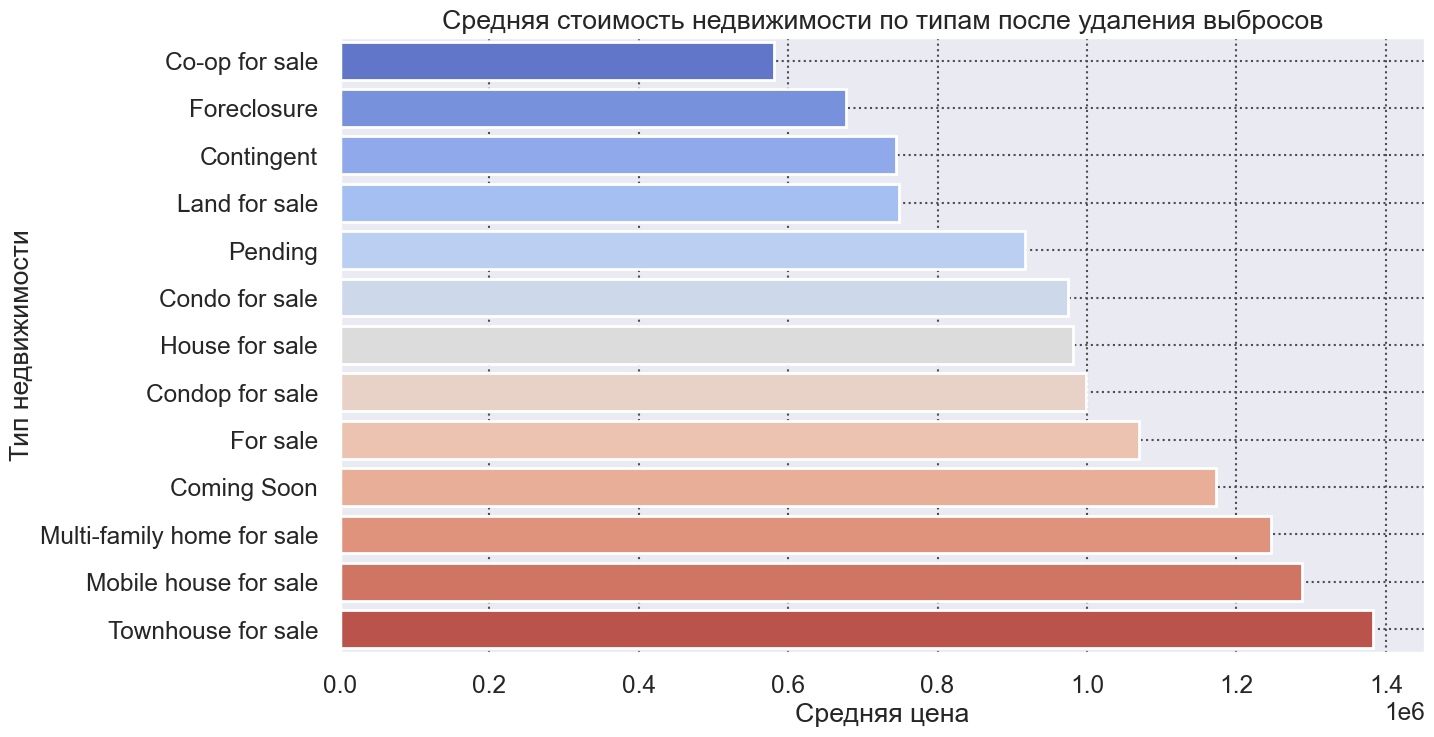

In [95]:
# Визуализация средней стоимости недвижимости после удаления выбросов
plt.figure(figsize=(14, 8))
average_price = ny_housing_no_outliers.groupby('TYPE')['PRICE'].mean().sort_values()
sns.barplot(x=average_price.values, y=average_price.index, palette='coolwarm')
plt.title('Средняя стоимость недвижимости по типам после удаления выбросов')
plt.xlabel('Средняя цена')
plt.ylabel('Тип недвижимости')
plt.grid(True)
plt.show()

# Задание 2.3

In [122]:
# Расчет среднего значения и стандартного отклонения для PROPERTYSQFT
mean_sqft = ny_housing_no_outliers['PROPERTYSQFT'].mean()
std_sqft = ny_housing_no_outliers['PROPERTYSQFT'].std()

# Определение границ для выбросов по правилу трех сигм
lower_bound = mean_sqft - 3 * std_sqft
upper_bound = mean_sqft + 3 * std_sqft

# Поиск выбросов
outliers = ny_housing_no_outliers[(ny_housing_no_outliers['PROPERTYSQFT'] < lower_bound) | (ny_housing_no_outliers['PROPERTYSQFT'] > upper_bound)]
outliers_count = outliers.shape[0]

# Вывод результатов
print(f"Min: {lower_bound}, Max: {upper_bound}, Count: {outliers_count}")

Min: -1208.1106777758923, Max: 4905.204507183718, Count: 63


По правилу трех сигм выбросами считаются значения, которые выходят за пределы установленных границ: ниже -1208 или выше 4905. Учитывая, что цена не может быть отрицательной, мы рассматриваем только верхнюю границу. На графике мы ожидаем увидеть выбросы в области справа от значения 4905

# Задание 2.4

In [123]:
mean_sqft = ny_housing_no_outliers['PROPERTYSQFT'].mean()
std_sqft = ny_housing_no_outliers['PROPERTYSQFT'].std()

In [124]:
# Определение границы для выбросов по правилу трех сигм
upper_bound = mean_sqft + 3 * std_sqft

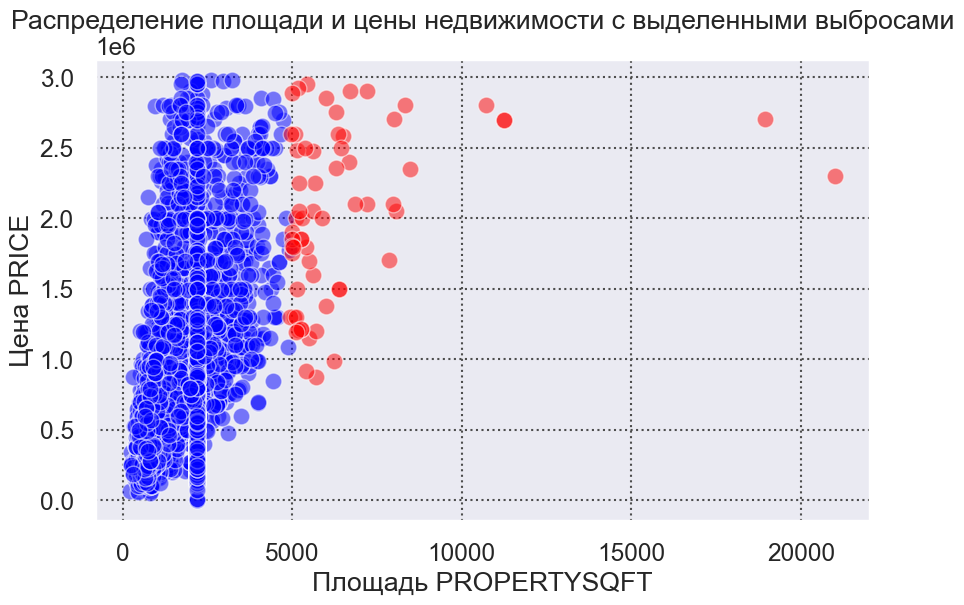

In [126]:
# Отображение scatter plot с выделением выбросов
plt.figure(figsize=(10, 6))
# Все точки ниже верхней границы
sns.scatterplot(x='PROPERTYSQFT', y='PRICE', data=ny_housing_no_outliers[ny_housing_no_outliers['PROPERTYSQFT'] <= upper_bound], color='blue', alpha=0.5)
# Выбросы - точки выше верхней границы
sns.scatterplot(x='PROPERTYSQFT', y='PRICE', data=ny_housing_no_outliers[ny_housing_no_outliers['PROPERTYSQFT'] > upper_bound], color='red', alpha=0.5)

plt.title('Распределение площади и цены недвижимости с выделенными выбросами')
plt.xlabel('Площадь PROPERTYSQFT')
plt.ylabel('Цена PRICE')
# plt.xscale('log')
# plt.yscale('log')
plt.show()

In [113]:
# Удаление выбросов из датасета
ny_housing = ny_housing[ny_housing['PROPERTYSQFT'] <= upper_bound]

# Задание 3.1. Создание модели парной регрессии

In [127]:
from sklearn.linear_model import LinearRegression

In [128]:
cleaned_ny_housing = ny_housing_no_outliers[ny_housing_no_outliers['PROPERTYSQFT'] <= upper_bound]

In [129]:
# Извлечение переменных для построения модели
X = cleaned_ny_housing[['PROPERTYSQFT']]  # Независимая переменная
y = cleaned_ny_housing['PRICE']            # Зависимая переменная

In [130]:
# Создание и обучение модели
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [131]:
# Вывод коэффициентов модели
intercept, coef = model.intercept_, model.coef_[0]
intercept, coef

(304377.56901855976, 324.59801749773806)

Свободный член, или точка пересечения с осью Y, равна примерно 304,377.57. Это означает, что если бы размер недвижимости (PROPERTYSQFT) был равен нулю, то ожидаемая цена (PRICE) составила бы примерно 304,377.57 долларов. Конечно, это теоретическое значение, поскольку площадь недвижимости не может быть нулевой, но это значение дает нам представление о базовой цене, от которой начинается оценка стоимости объектов недвижимости.

Коэффициент наклона указывает на то, что с каждым дополнительным квадратным футом площади ожидаемая цена недвижимости увеличивается на примерно 324.60 долларов. Это довольно логично, так как обычно чем больше размер недвижимости, тем выше ее цена

Однако, важно отметить, что реальный рынок недвижимости намного сложнее, и цена может зависеть от множества других факторов, таких как местоположение, состояние недвижимости, рыночные тенденции, доступность инфраструктуры и многое другое. Также стоит учитывать, что наличие выбросов может исказить результаты регрессии

Теоретически, результаты выглядят логичными и соответствуют общему представлению о зависимости цены недвижимости от ее размера. Хотя цена за кв.ф. получилось довольно низкой, что вряд ли соответствует действительности

# Задание 3.2. Визуализация результата

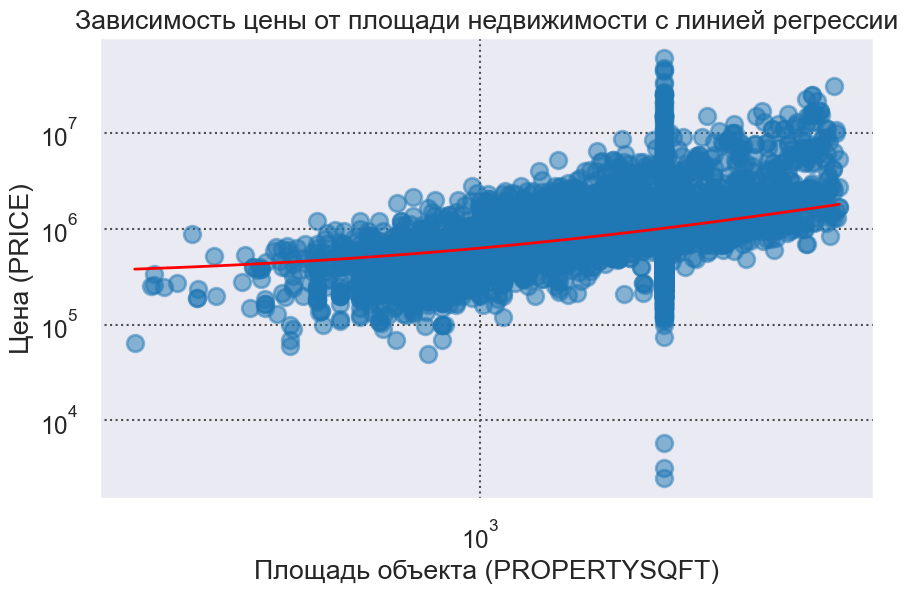

In [135]:
# Создание scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ny_housing['PROPERTYSQFT'], ny_housing['PRICE'], alpha=0.5)

# Создание линии регрессии
line_x = np.linspace(ny_housing['PROPERTYSQFT'].min(), ny_housing['PROPERTYSQFT'].max(), 100)
line_y = intercept + coef * line_x
plt.plot(line_x, line_y, color='red', linewidth=2)

# Настройка графика
plt.title('Зависимость цены от площади недвижимости с линией регрессии')
plt.xlabel('Площадь объекта (PROPERTYSQFT)')
plt.ylabel('Цена (PRICE)')
plt.xscale('log')
plt.yscale('log')
plt.show()

# Bonus. Визуализация геоданных

In [1]:
import folium

In [7]:
map = folium.Map(location=[40.7, -73.9], zoom_start=10)
points = ny_housing[['LATITUDE', 'LONGITUDE']].values.tolist()[:500]
for i, point in enumerate(points):
    folium\
        .Marker(point, 
                popup=str(ny_housing['PRICE'].iloc[i]), 
                tooltip=ny_housing['MAIN_ADDRESS'].iloc[i])\
        .add_to(map)
map